In [1]:
import numpy as np
import pandas as pd
import nltk
import string
#import fasttext
#import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [2]:
## Process Data
rawData = pd.read_csv('potential-talents - Aspiring human resources - seeking human resources.csv')

In [3]:
# Copy and merge in the location data
textProcessing = rawData.copy()
textProcessing['mergeColumns'] = textProcessing['job_title'].astype(str) + " " + \
                                 textProcessing['location'].astype(str)
    
# Tokenize merged column
textProcessing['tokenized'] = textProcessing['mergeColumns'].apply(word_tokenize)

# Move to lowercase, remove punctuation
textProcessing['lower'] = textProcessing['tokenized'].apply(lambda x: [word.lower() for word in x])
textProcessing['no_punc'] = textProcessing['lower'].apply(lambda x: [word for word in x if word not in string.punctuation])

# Remove stop words
stop_words = set(stopwords.words('english'))
stop_words.add('area')
stop_words.add('greater')
textProcessing['stopwords_removed'] = textProcessing['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])

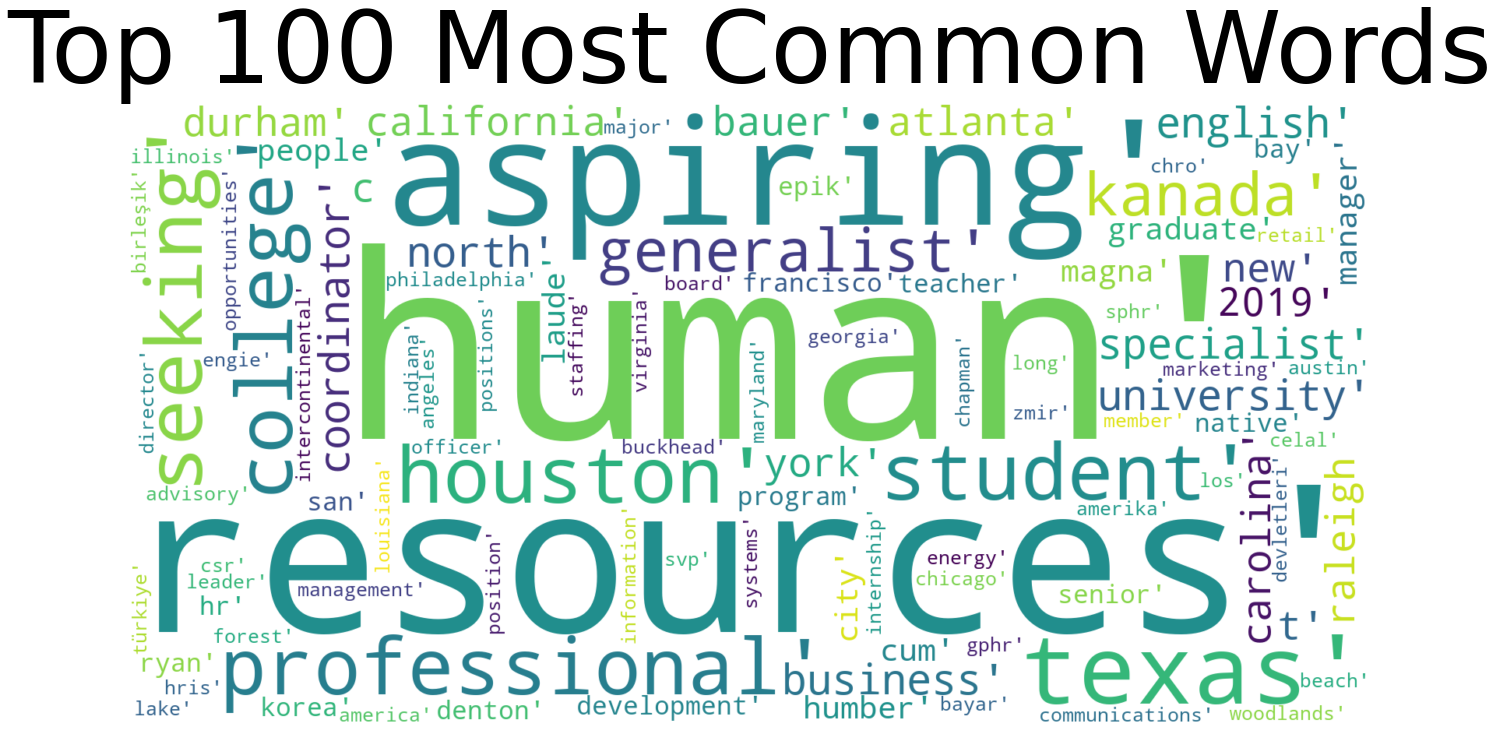

In [4]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

allwords = []
for wordlist in textProcessing['stopwords_removed']:
    allwords += wordlist

mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

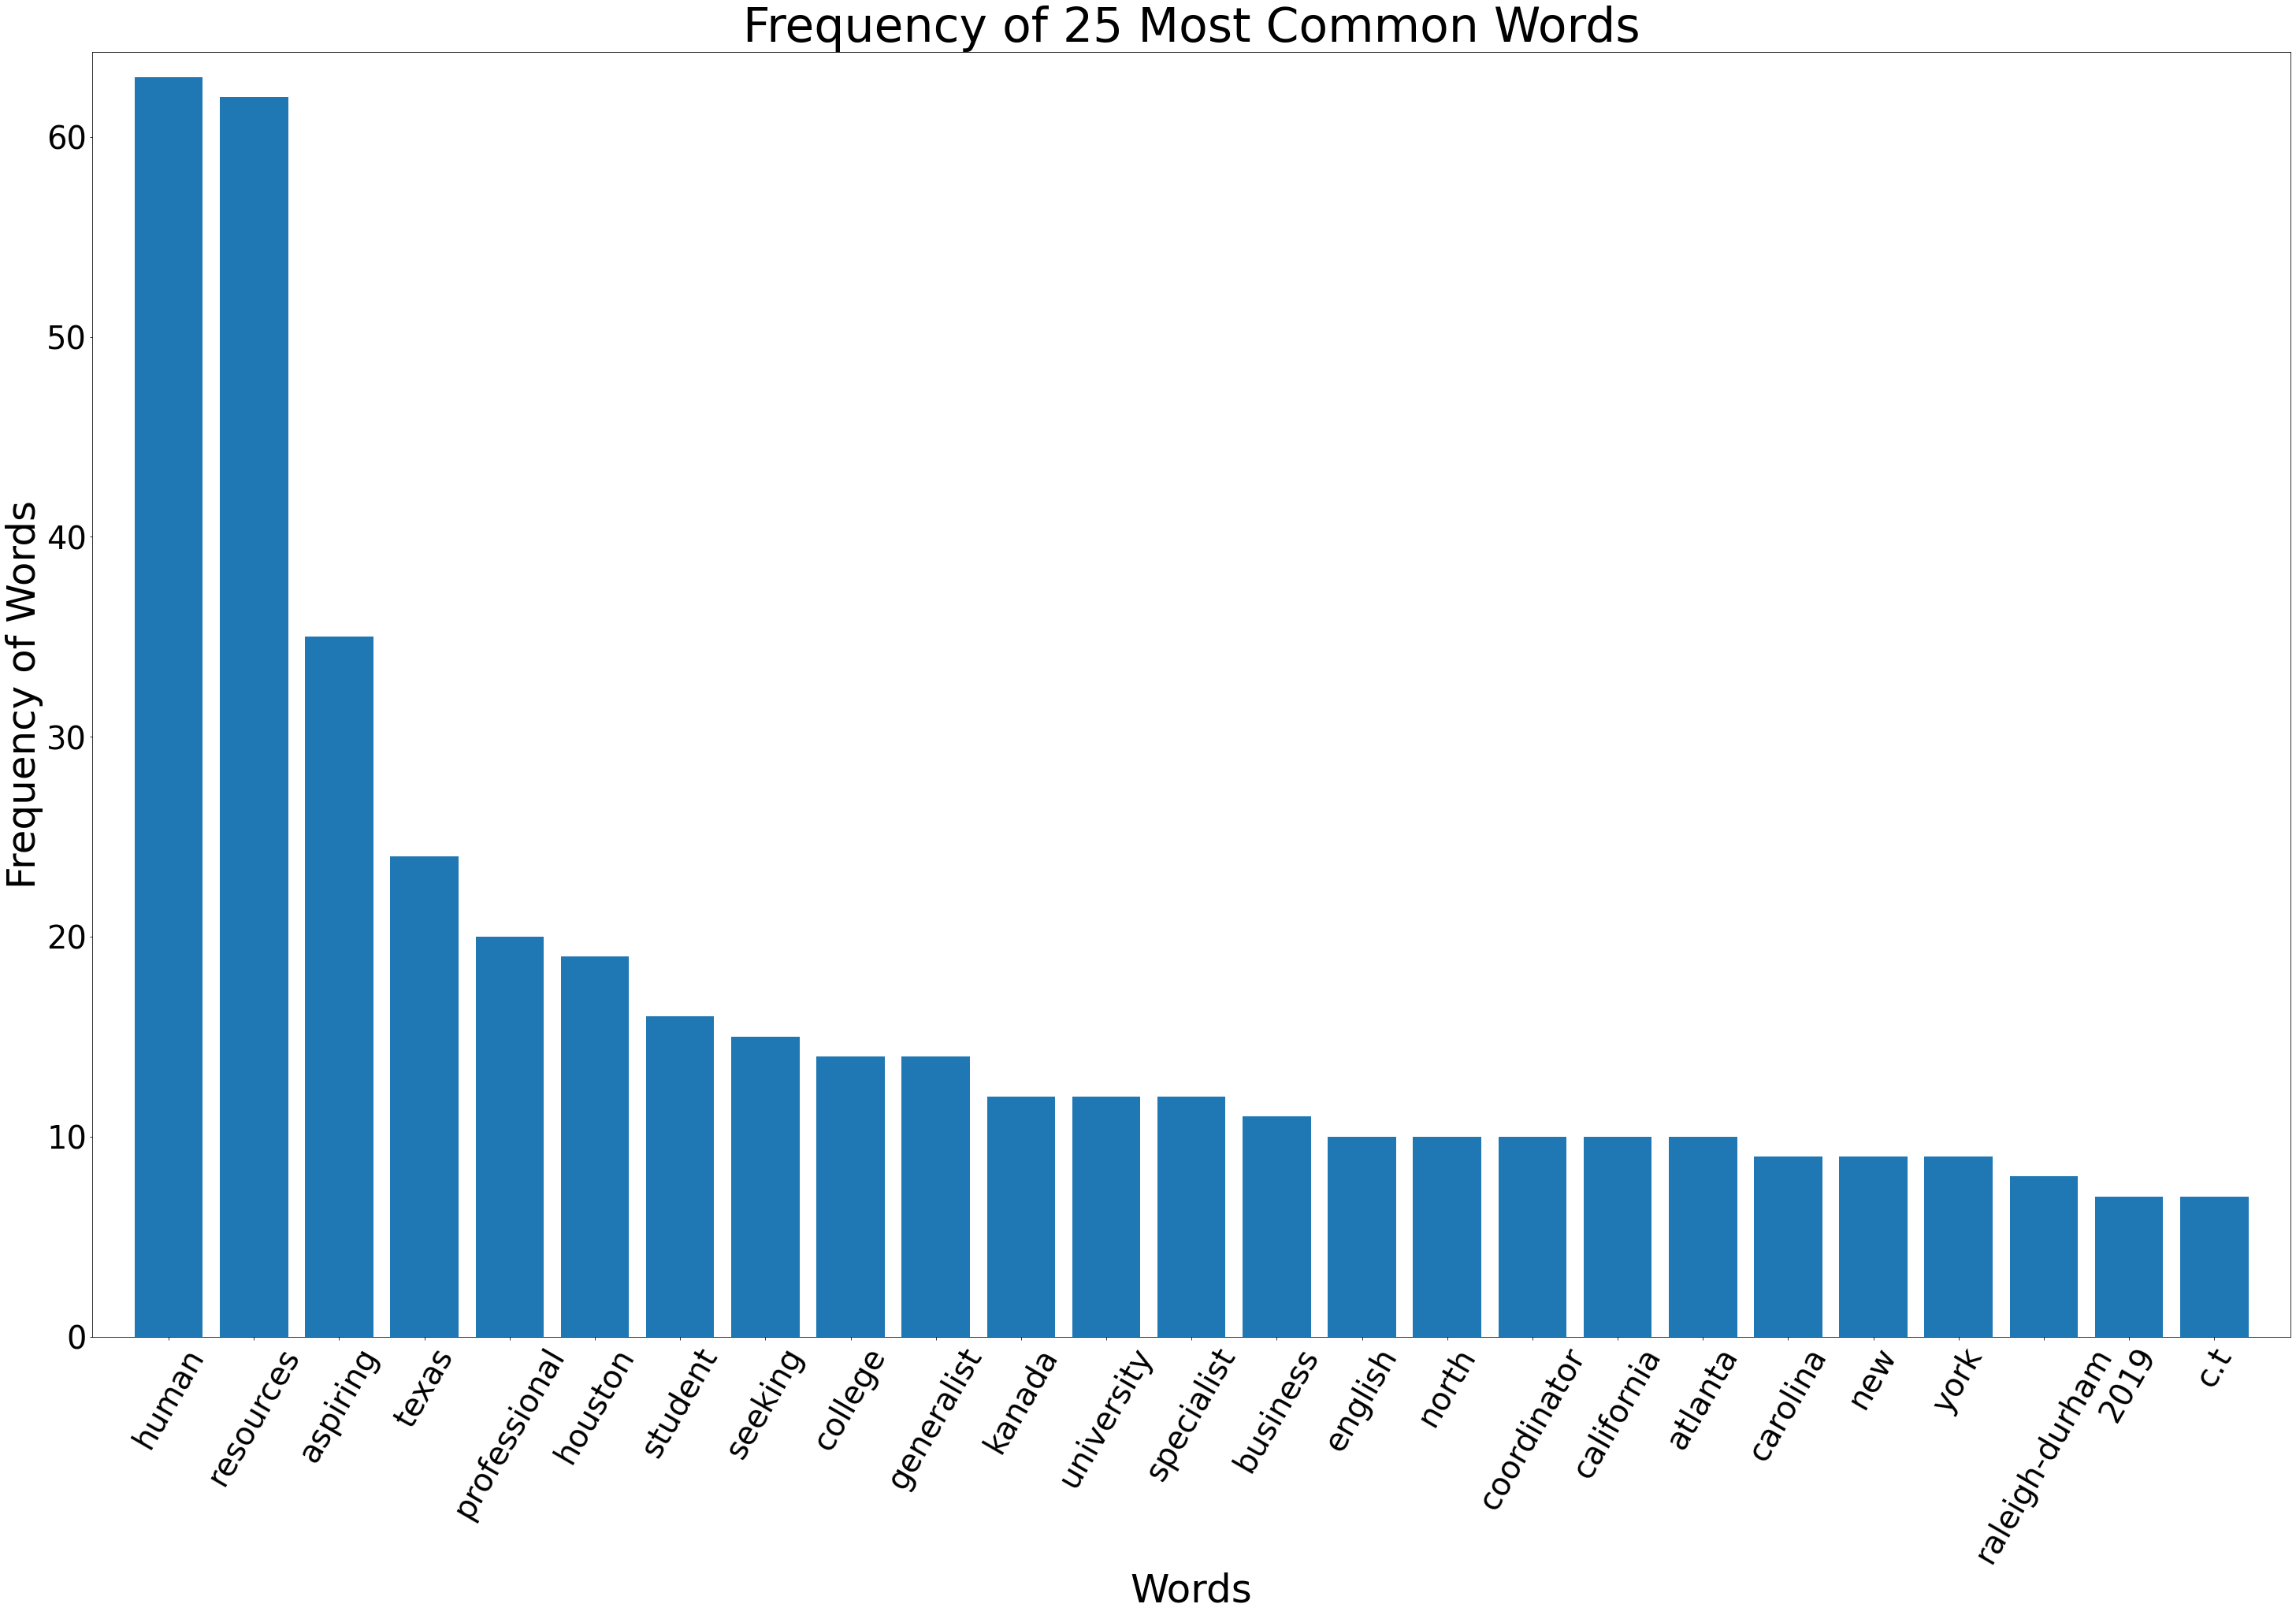

In [5]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

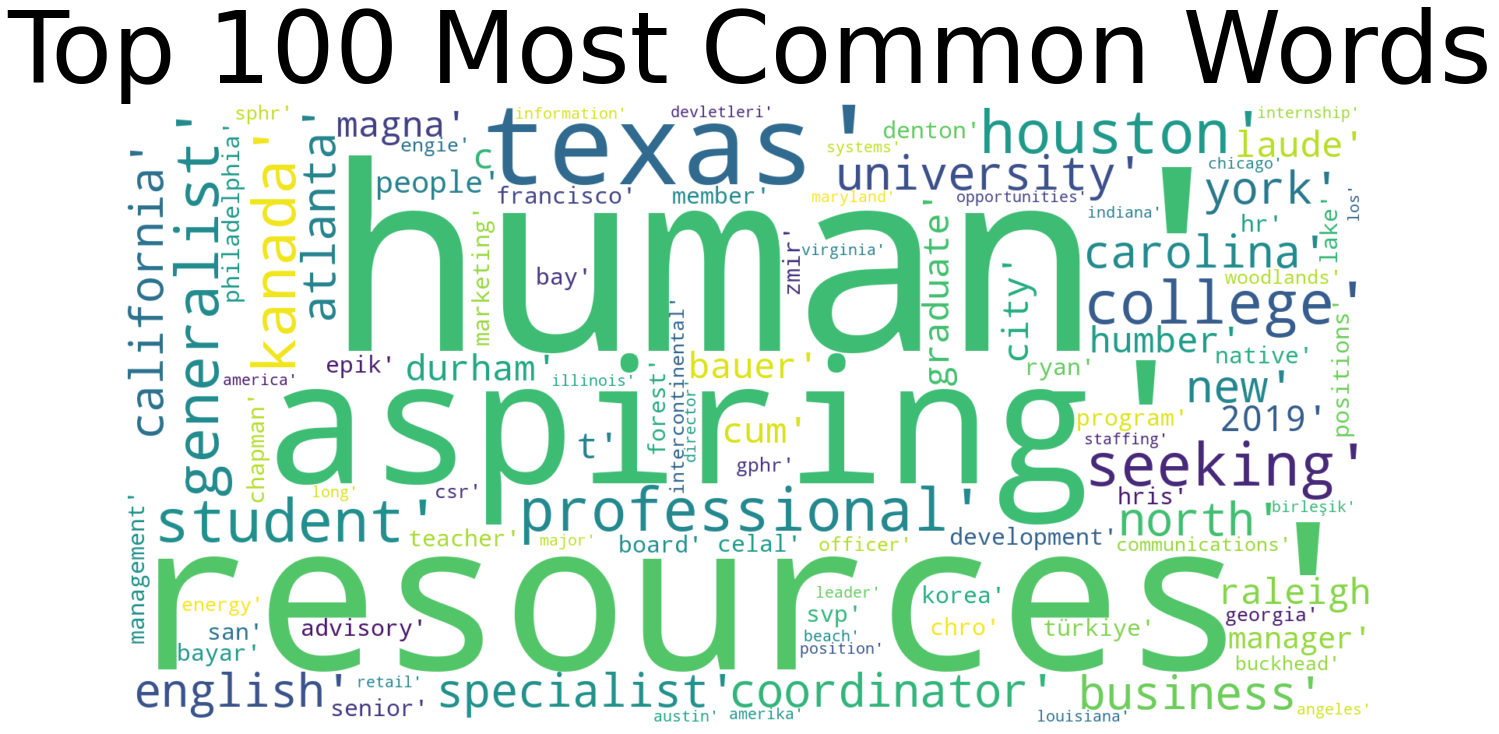

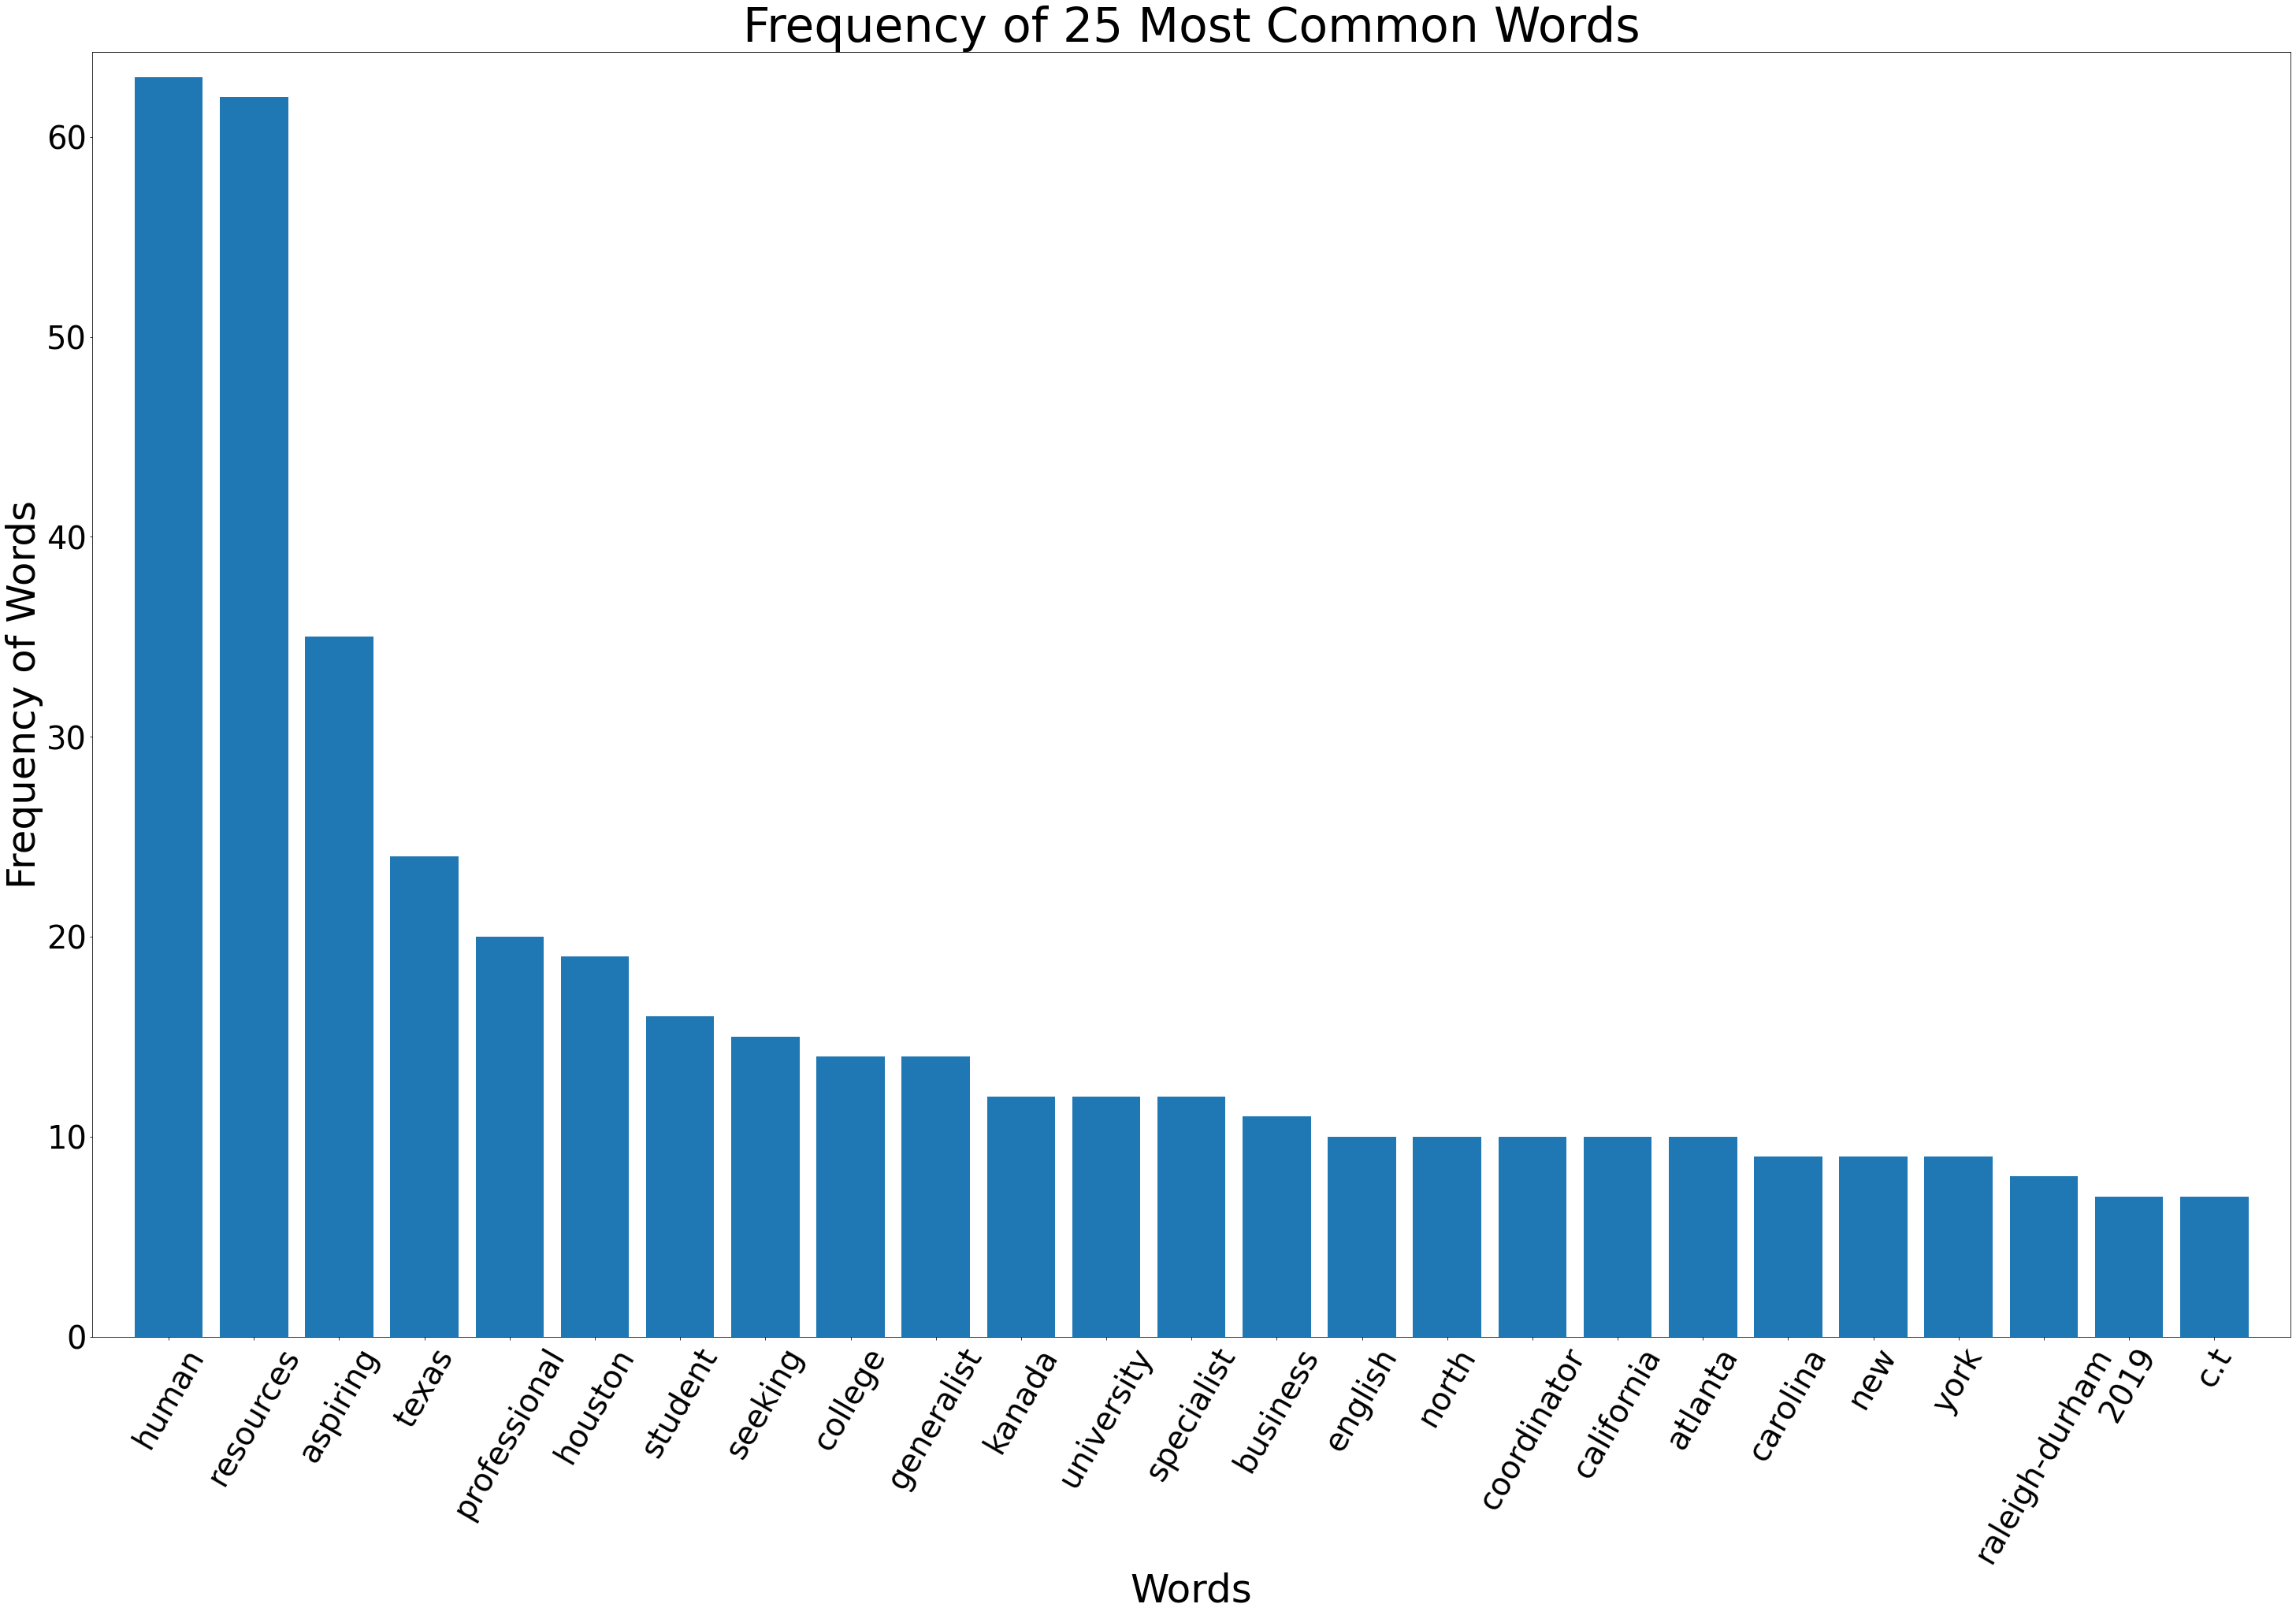

In [6]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

allwords = []
for wordlist in textProcessing['stopwords_removed']:
    allwords += wordlist

mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

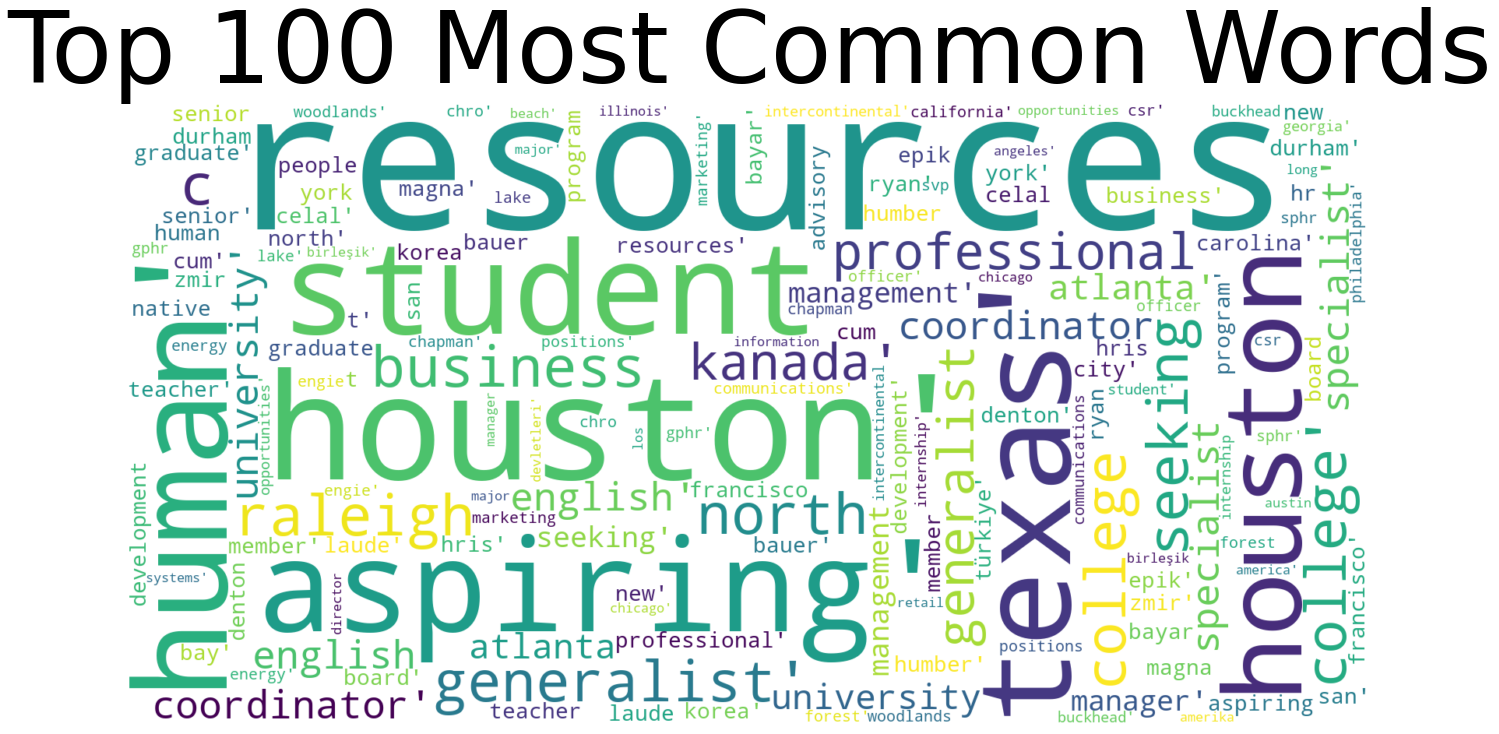

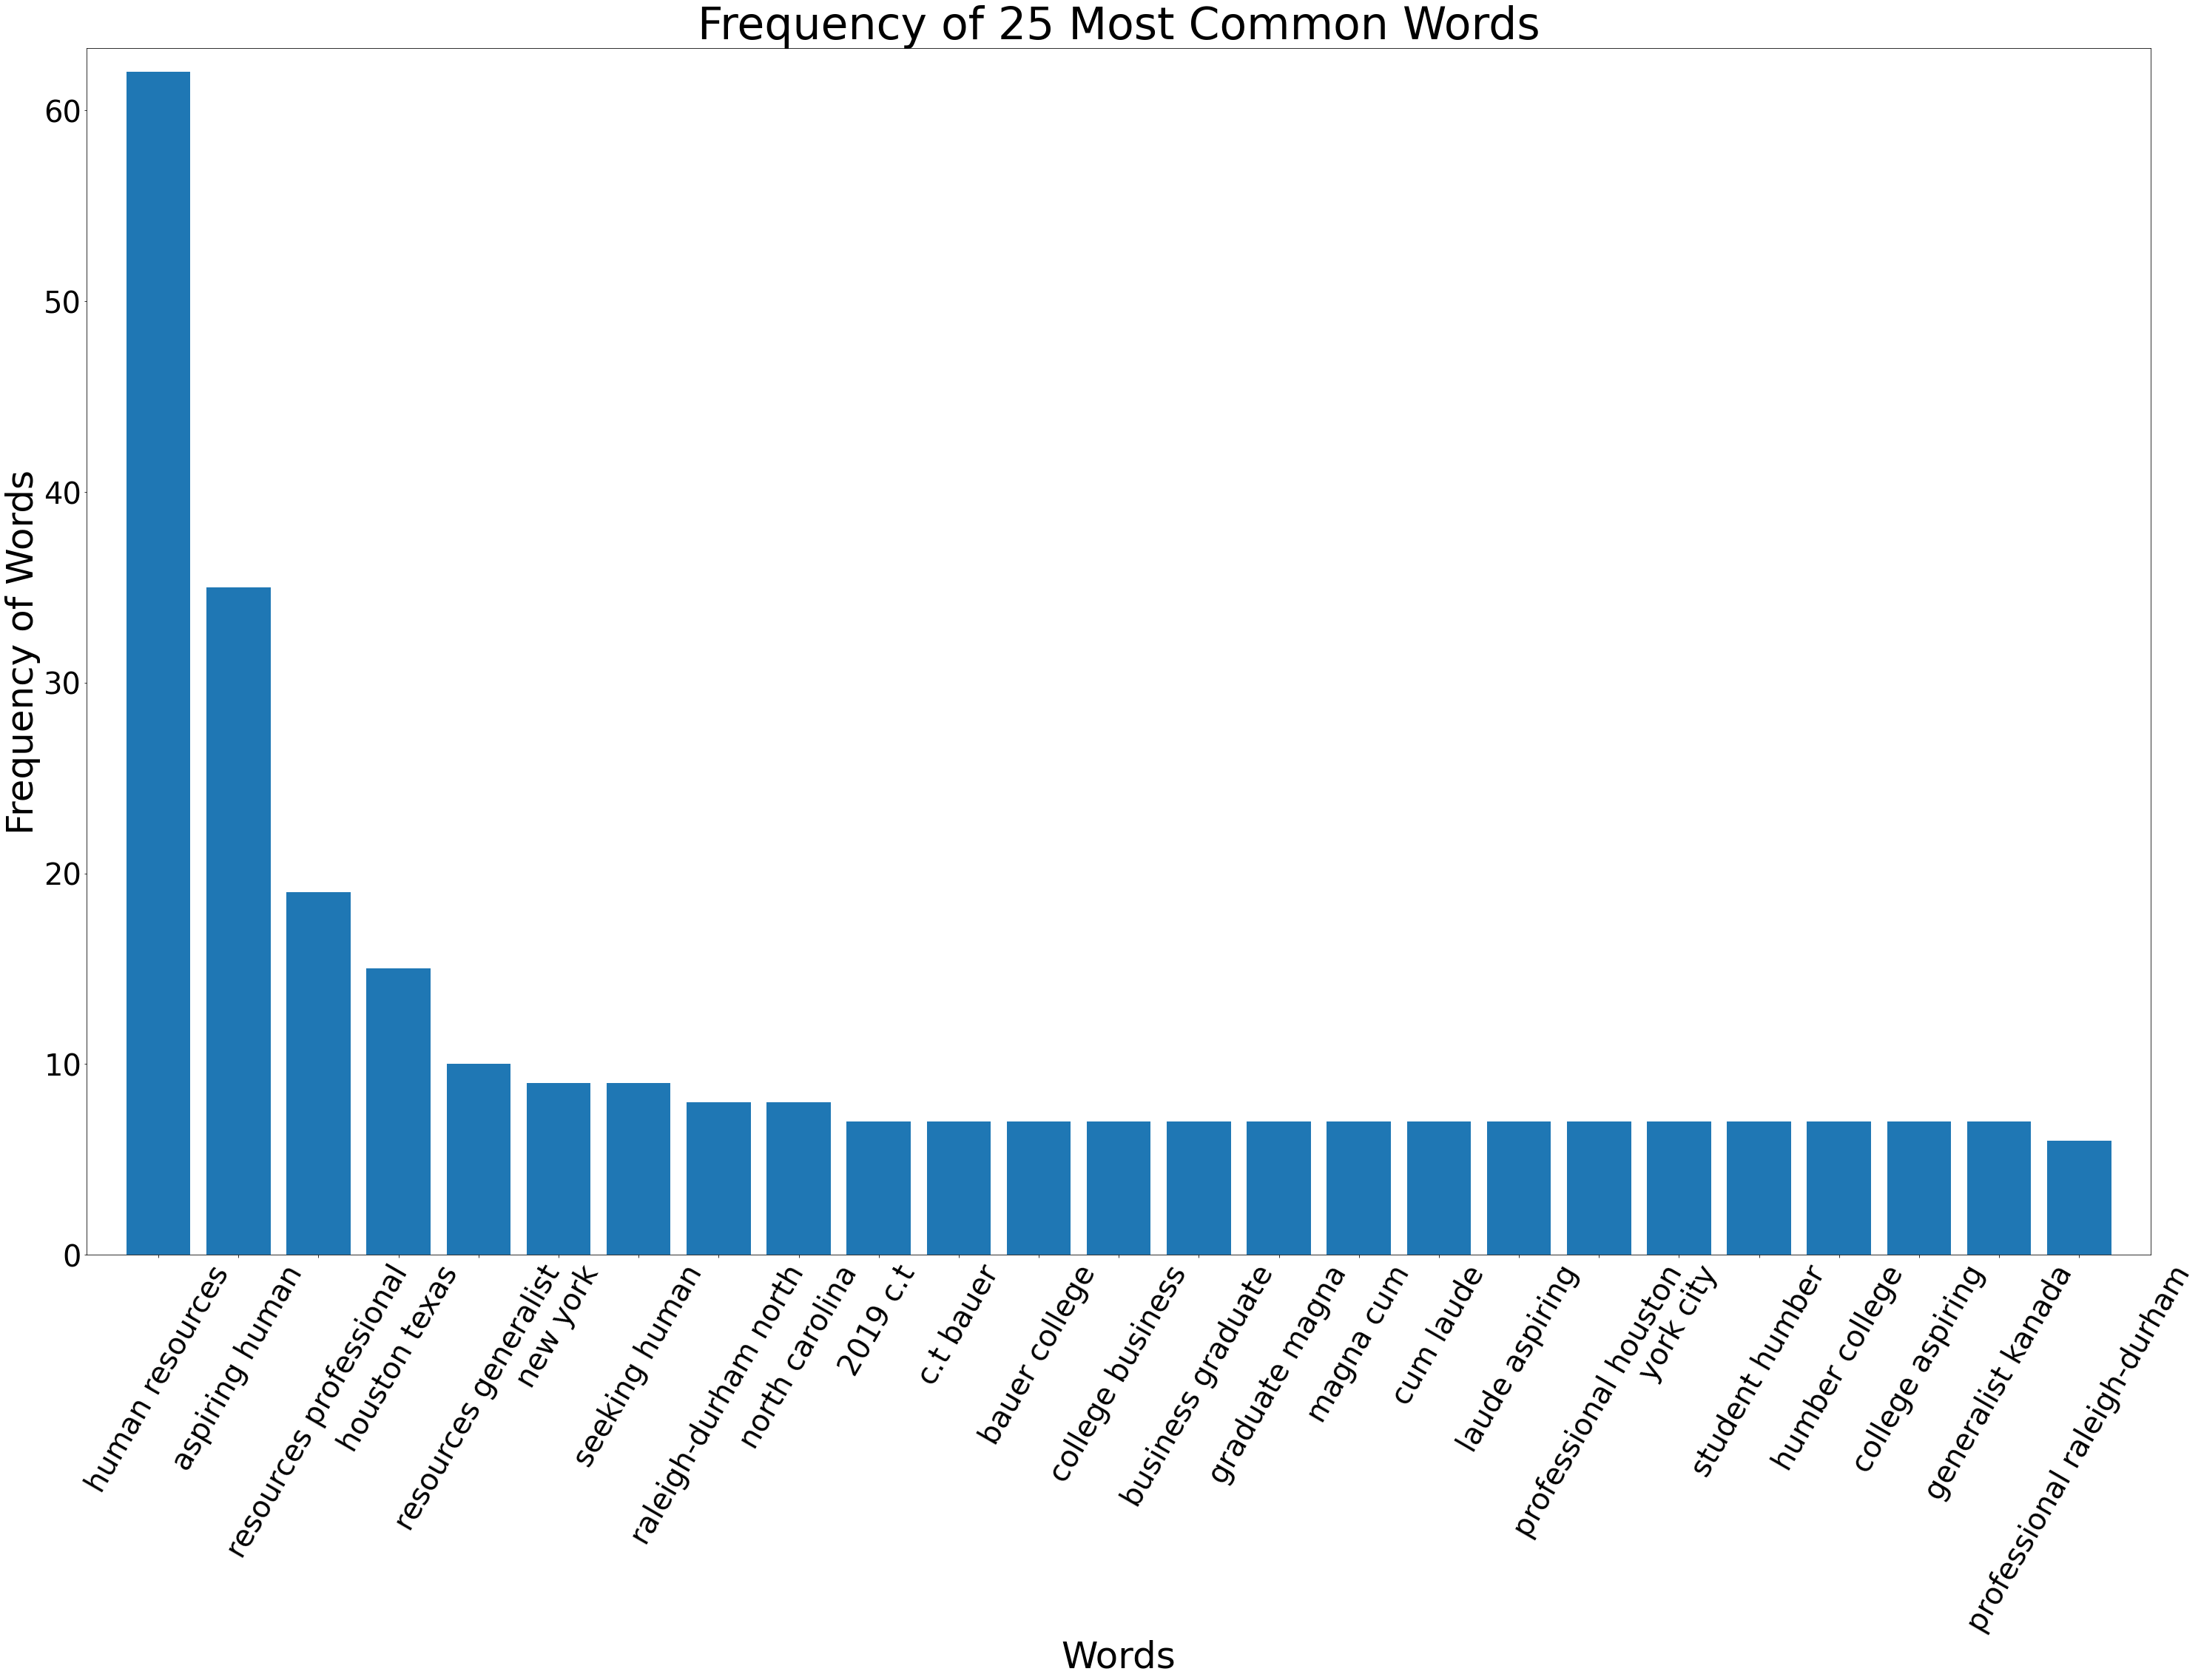

In [7]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

allwords = []
for setOfWords in textProcessing['stopwords_removed']:
    for index in range(len(setOfWords) - 1):
        allwords += [setOfWords[index] + " " + setOfWords[index+1]]

mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

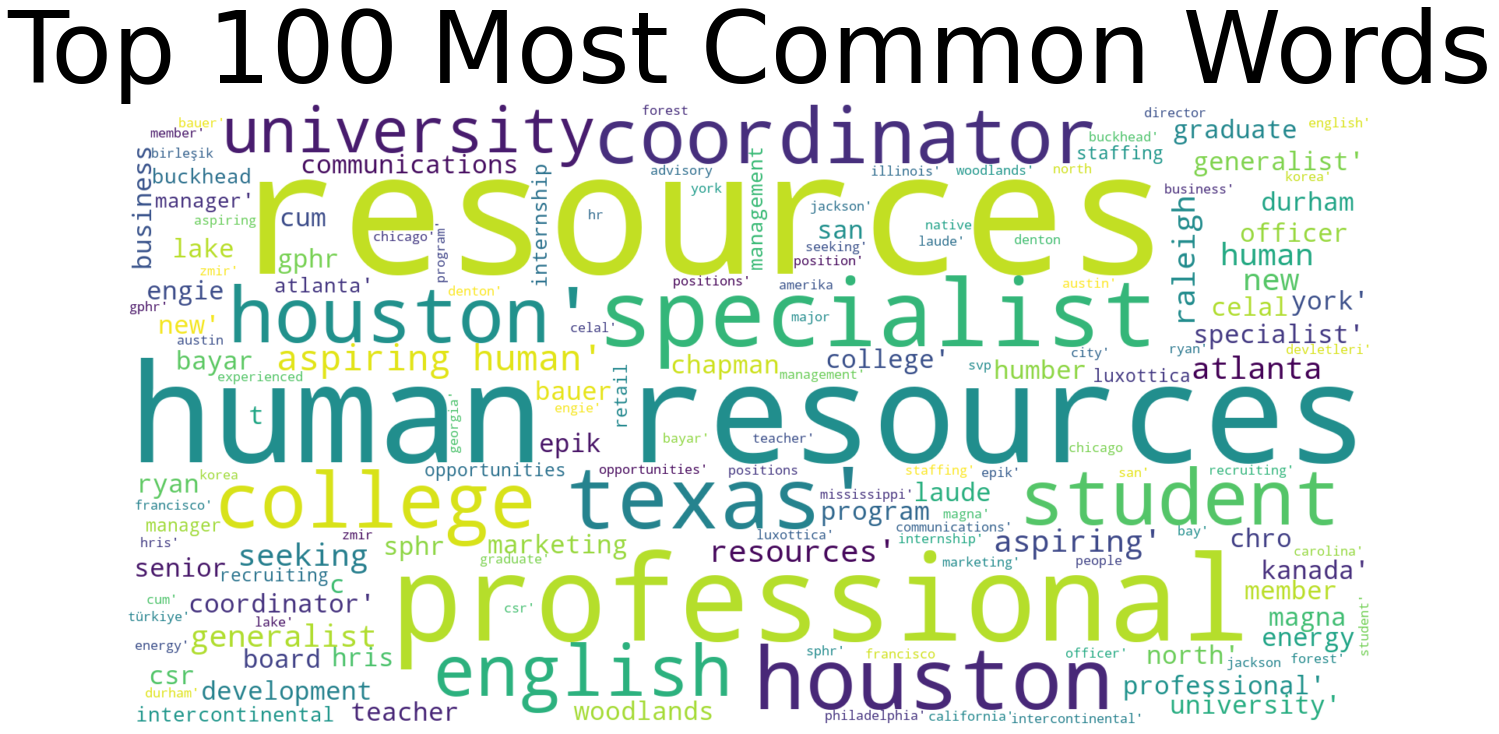

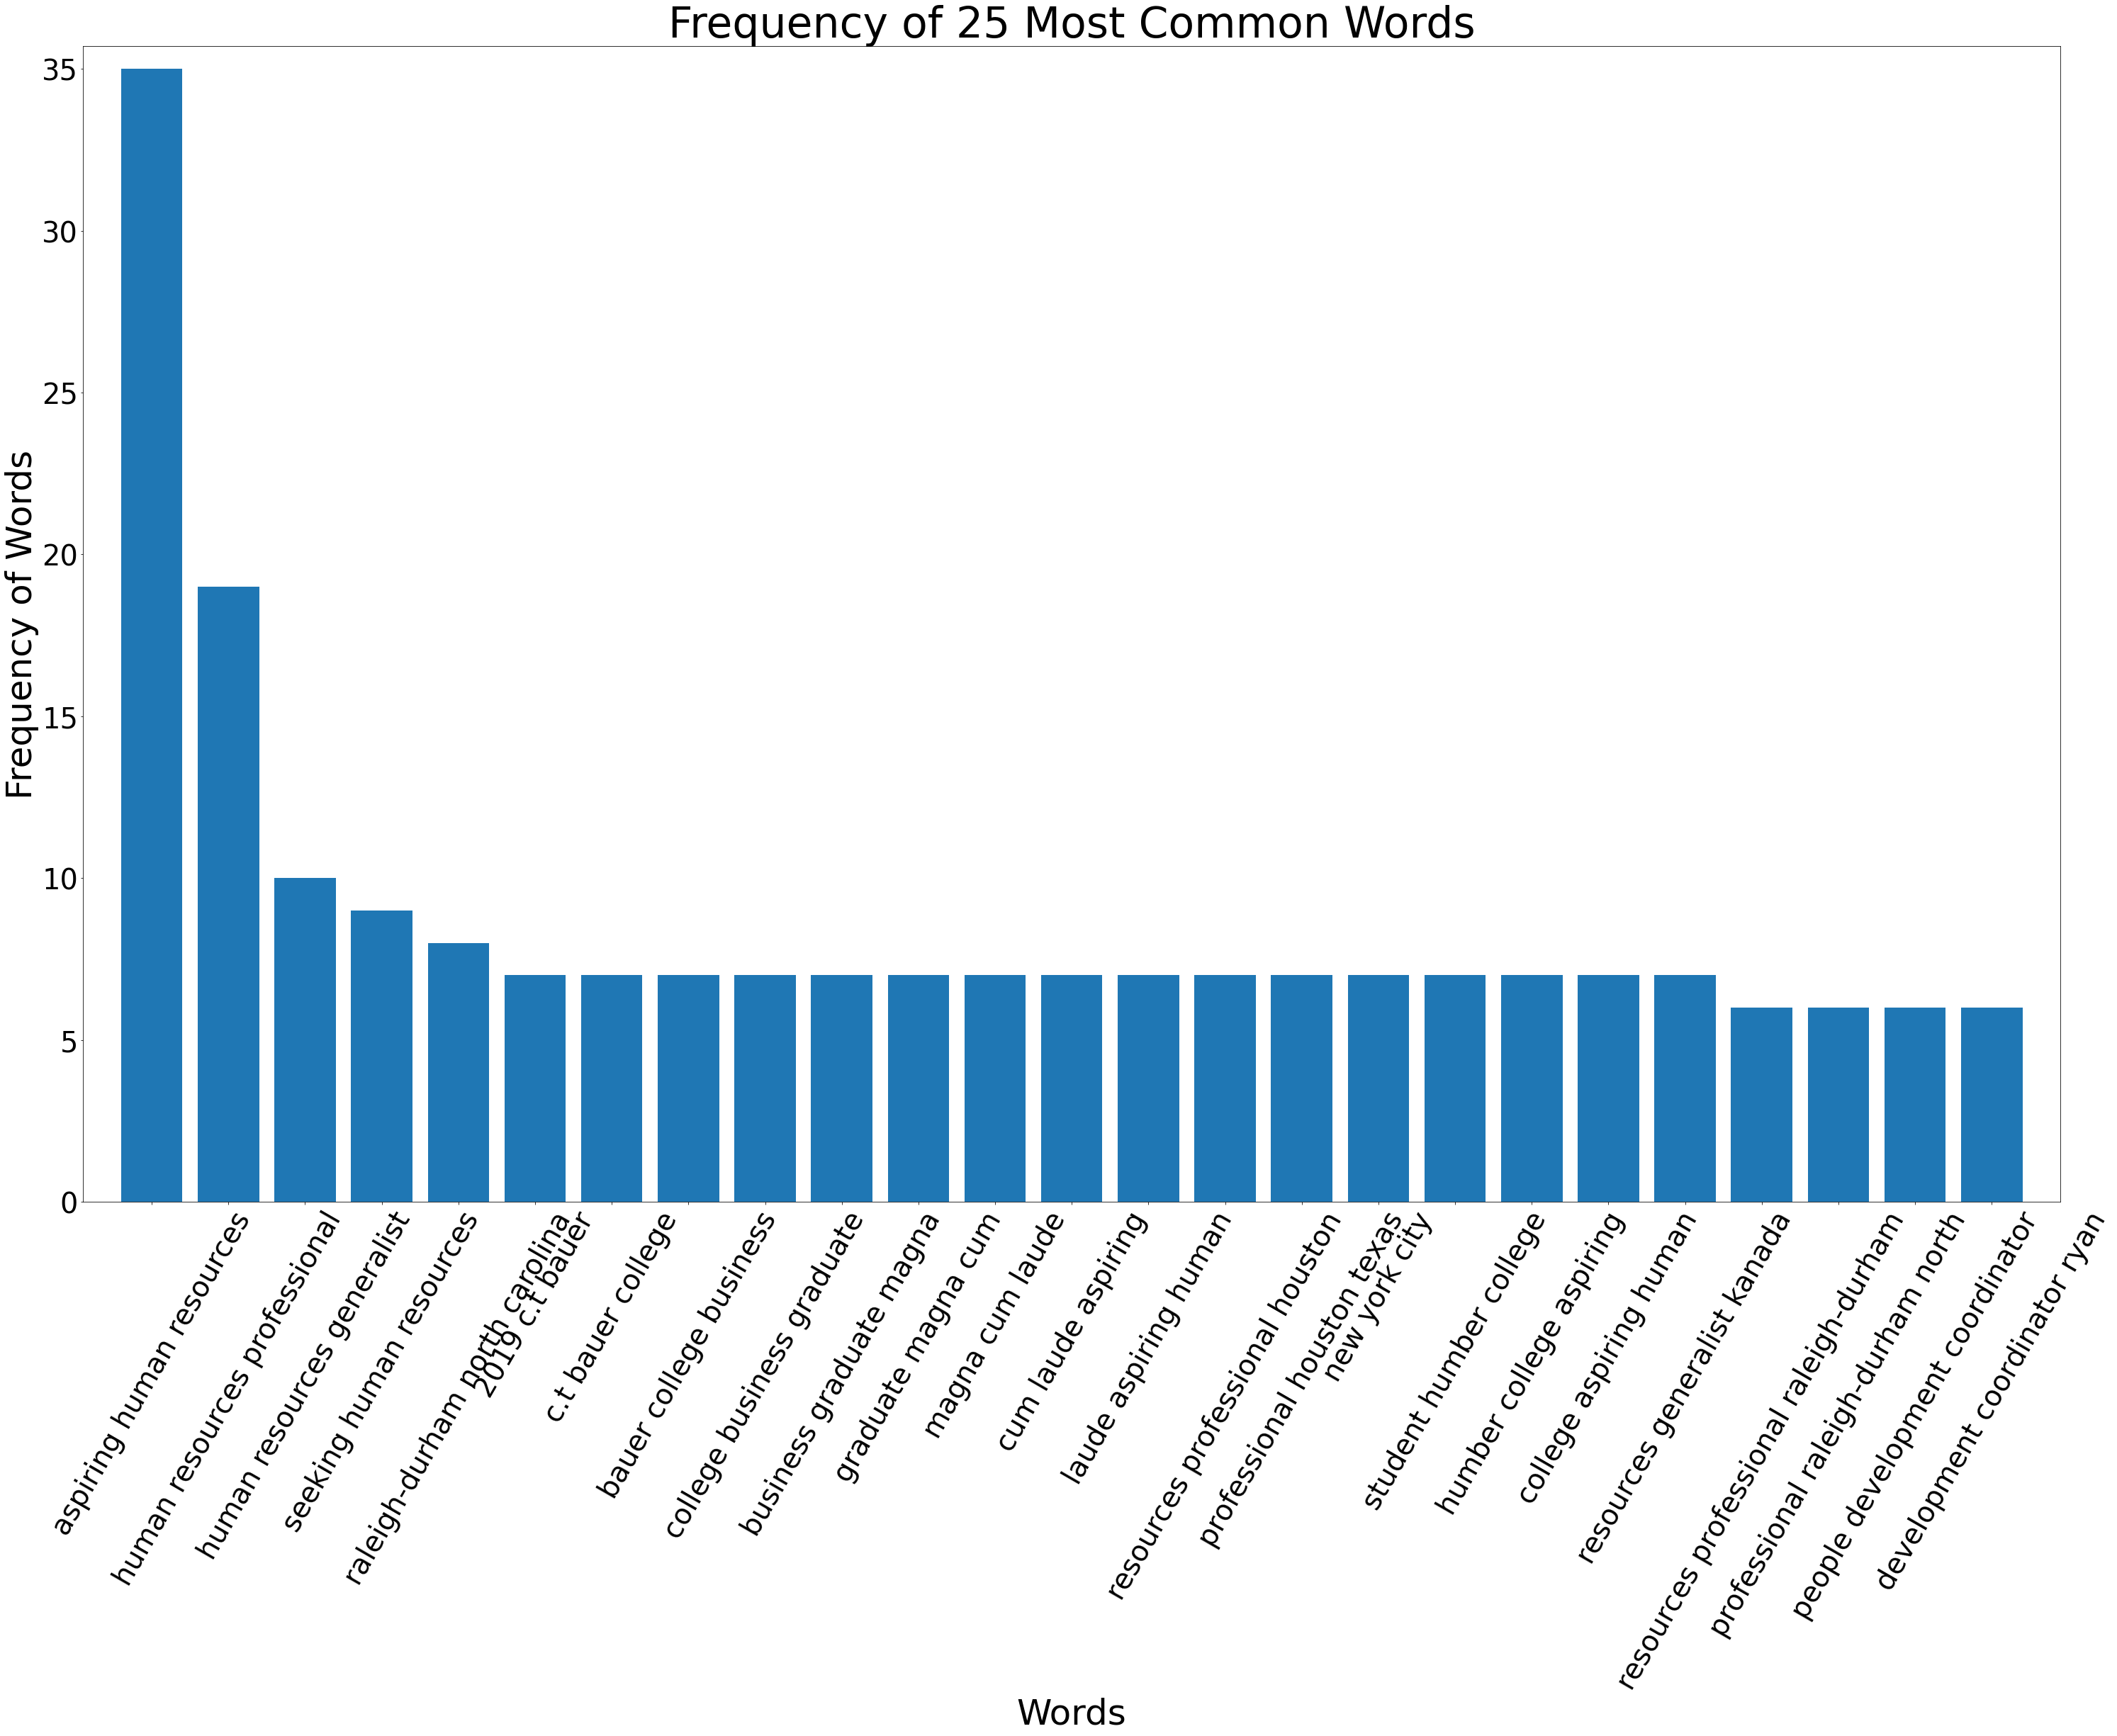

In [8]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

allwords = []
for setOfWords in textProcessing['stopwords_removed']:
    for index in range(len(setOfWords) - 2):
        allwords += [setOfWords[index] + " " + setOfWords[index+1] + " " + setOfWords[index+2]]

mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [9]:
#import gensim
from gensim.models import Word2Vec

model1 = Word2Vec(textProcessing['stopwords_removed'], min_count = 1,
                              vector_size = 20, window = 3)

#print("Cosine similarity between 'human' " +
#               "and 'resources' - CBOW : ",
#    model1.wv.similarity(textProcessing['stopwords_removed'][0], textProcessing['stopwords_removed'][1]))

In [10]:
textProcessing['new_str'] = [' '.join(map(str,l)) for l in textProcessing['stopwords_removed']]

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df = 3, max_features=5000, use_idf=True, ngram_range=(3,3))
tfidf = tfidf_vectorizer.fit_transform(textProcessing['new_str'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

2019 bauer college  advisory board member  aspiring human resources  \
0              0.303051               0.000000                  0.175534   
1              0.000000               0.000000                  0.000000   
2              0.000000               0.000000                  0.261370   
3              0.000000               0.000000                  0.000000   
4              0.000000               0.408248                  0.000000   
..                  ...                    ...                       ...   
99             0.000000               0.000000                  0.436490   
100            0.000000               0.000000                  0.000000   
101            0.000000               0.000000                  0.000000   
102            0.000000               0.000000                  0.000000   
103            0.000000               0.000000                  0.000000   

     atlanta atlanta georgia  bauer college business  bayar university zmir  \
0                        0.0                0.303051               0.000000   
1                        0.0                0.000000               0.000000   
2                        0.0                0.000000               0.000000   
3                        0.0                0.000000               0.000000   
4                        0.0                0.000000               0.408248   
..                       ...                     ...                    ...   
99                       0.0                0.000000               0.000000   
100                      0.0                0.000000               0.000000   
101                      0.0                0.000000               0.000000   
102                      0.0                0.000000               0.000000   
103                      0.0                0.000000               0.000000   

     board member celal  buckhead atlanta atlanta  business graduate magna  \
0              0.000000                       0.0                 0.303051   
1              0.000000                       0.0                 0.000000   
2              0.000000                       0.0                 0.000000   
3              0.000000                       0.0                 0.000000   
4              0.408248                       0.0                 0.000000   
..                  ...                       ...                      ...   
99             0.000000                       0.0                 0.000000   
100            0.000000                       0.0                 0.000000   
101            0.000000                       0.0                 0.000000   
102            0.000000                       0.0                 0.000000   
103            0.000000                       0.0                 0.000000   

     celal bayar university  ...  specialist new york  \
0                  0.000000  ...                  0.0   
1                  0.000000  ...                  0.0   
2                  0.000000  ...                  0.0   
3                  0.000000  ...                  0.0   
4                  0.408248  ...                  0.0   
..                      ...  ...                  ...   
99                 0.000000  ...                  0.0   
100                0.000000  ...                  0.0   
101                0.000000  ...                  0.0   
102                0.000000  ...                  0.0   
103                0.000000  ...                  0.0   

     specialist san francisco  sphr houston texas  student chapman university  \
0                         0.0                 0.0                         0.0   
1                         0.0                 0.0                         0.0   
2                         0.0                 0.0                         0.0   
3                         0.0                 0.0                         0.0   
4                         0.0                 0.0                         0.0   
..                        ...      

In [12]:
tmp = pd.concat([textProcessing, doc_term_matrix_tfidf], axis=1)

In [13]:
tmp.sort_values(by='aspiring human resources', ascending=False)[['job_title', 'location', 'connection', 'aspiring human resources']]

job_title  \
78   Liberal Arts Major. Aspiring Human Resources A...   
96               Aspiring Human Resources Professional   
65   Experienced Retail Manager and aspiring Human ...   
75   Aspiring Human Resources Professional | Passio...   
81   Aspiring Human Resources Professional | An ene...   
..                                                 ...   
44   Native English Teacher at EPIK (English Progra...   
42   Human Resources Coordinator at InterContinenta...   
41   SVP, CHRO, Marketing & Communications, CSR Off...   
40                       Student at Chapman University   
103   Director Of Administration at Excellence Logging   

                        location connection  aspiring human resources  
78   Baton Rouge, Louisiana Area          7                  1.000000  
96          Kokomo, Indiana Area         71                  0.614482  
65            Austin, Texas Area         57                  0.614482  
75            New York, New York        212                  0.614482  
81            Austin, Texas Area        174                  0.614482  
..                           ...        ...                       ...  
44                        Kanada      500+                   0.000000  
42              Atlanta, Georgia      500+                   0.000000  
41           Houston, Texas Area      500+                   0.000000  
40       Lake Forest, California          2                  0.000000  
103                  Katy, Texas      500+                   0.000000  

[104 rows x 4 columns]

In [14]:
tmp.sort_values(by='seeking human resources', ascending=False)[['job_title', 'location', 'connection', 'seeking human resources']]

job_title  \
74   Nortia Staffing is seeking Human Resources, Pa...   
98                    Seeking Human Resources Position   
27               Seeking Human Resources Opportunities   
29               Seeking Human Resources Opportunities   
93   Seeking Human  Resources Opportunities. Open t...   
..                                                 ...   
33              People Development Coordinator at Ryan   
32               Aspiring Human Resources Professional   
31   Native English Teacher at EPIK (English Progra...   
30   2019 C.T. Bauer College of Business Graduate (...   
103   Director Of Administration at Excellence Logging   

                                location connection  seeking human resources  
74                  San Jose, California      500+                  1.000000  
98                Las Vegas, Nevada Area         48                 1.000000  
27                     Chicago, Illinois        390                 0.617617  
29                     Chicago, Illinois        390                 0.617617  
93           Amerika Birleşik Devletleri        415                 0.617617  
..                                   ...        ...                      ...  
33                         Denton, Texas      500+                  0.000000  
32   Raleigh-Durham, North Carolina Area         44                 0.000000  
31                                Kanada      500+                  0.000000  
30                        Houston, Texas         85                 0.000000  
103                          Katy, Texas      500+                  0.000000  

[104 rows x 4 columns]

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

count_vectorizer = CountVectorizer(max_df=0.90, min_df = 3, max_features=5000, ngram_range=(3,3))
countVec = count_vectorizer.fit_transform(textProcessing['new_str'])
countVec_feature_names = count_vectorizer.get_feature_names()
doc_term_matrix_countVec = pd.DataFrame(countVec.toarray(), columns=list(countVec_feature_names))
doc_term_matrix_countVec

2019 bauer college  advisory board member  aspiring human resources  \
0                     1                      0                         1   
1                     0                      0                         0   
2                     0                      0                         1   
3                     0                      0                         0   
4                     0                      1                         0   
..                  ...                    ...                       ...   
99                    0                      0                         1   
100                   0                      0                         0   
101                   0                      0                         0   
102                   0                      0                         0   
103                   0                      0                         0   

     atlanta atlanta georgia  bauer college business  bayar university zmir  \
0                          0                       1                      0   
1                          0                       0                      0   
2                          0                       0                      0   
3                          0                       0                      0   
4                          0                       0                      1   
..                       ...                     ...                    ...   
99                         0                       0                      0   
100                        0                       0                      0   
101                        0                       0                      0   
102                        0                       0                      0   
103                        0                       0                      0   

     board member celal  buckhead atlanta atlanta  business graduate magna  \
0                     0                         0                        1   
1                     0                         0                        0   
2                     0                         0                        0   
3                     0                         0                        0   
4                     1                         0                        0   
..                  ...                       ...                      ...   
99                    0                         0                        0   
100                   0                         0                        0   
101                   0                         0                        0   
102                   0                         0                        0   
103                   0                         0                        0   

     celal bayar university  ...  specialist new york  \
0                         0  ...                    0   
1                         0  ...                    0   
2                         0  ...                    0   
3                         0  ...                    0   
4                         1  ...                    0   
..                      ...  ...                  ...   
99                        0  ...                    0   
100                       0  ...                    0   
101                       0  ...                    0   
102                       0  ...                    0   
103                       0  ...                    0   

     specialist san francisco  sphr houston texas  student chapman university  \
0                           0                   0                           0   
1                           0                   0                           0   
2                           0                   0                           0   
3                           0                   0                           0   
4                           0                   0                           0   
..                        ...      

In [37]:
doc_term_matrix_countVec.sum(axis=1)[74:80]

74    1
75    2
76    0
77    1
78    1
79    0
dtype: int64

In [32]:
tfidf_vectorizer.idf_

array([3.57451881, 4.04452244, 2.07044141, 4.04452244, 3.57451881,
       4.04452244, 4.04452244, 4.04452244, 3.57451881, 4.04452244,
       4.04452244, 4.04452244, 3.57451881, 3.57451881, 4.04452244,
       4.04452244, 3.7080502 , 4.04452244, 3.57451881, 3.7080502 ,
       3.45673577, 4.04452244, 4.04452244, 3.86220088, 3.86220088,
       3.86220088, 4.04452244, 4.04452244, 3.57451881, 4.04452244,
       3.86220088, 4.04452244, 4.04452244, 3.25606508, 4.04452244,
       4.26766599, 4.26766599, 4.26766599, 2.65822808, 3.7080502 ,
       3.57451881, 4.04452244, 4.04452244, 3.57451881, 3.57451881,
       4.04452244, 4.04452244, 3.86220088, 3.57451881, 4.04452244,
       3.7080502 , 3.57451881, 3.7080502 , 3.86220088, 3.45673577,
       4.04452244, 3.57451881, 4.04452244, 3.57451881, 3.7080502 ,
       3.86220088, 3.7080502 , 3.86220088, 3.35137526, 3.86220088,
       3.86220088, 3.86220088, 4.04452244, 4.04452244, 3.57451881,
       4.04452244, 3.86220088, 4.04452244, 4.04452244, 4.04452